Run   Edge Updates    Unsafe Updates  Percentage (%) 
--------------------------------------------------
1     4285124         6515            0.152038
2     4285124         9960            0.232432
3     4285124         5995            0.139903
4     4285124         5318            0.124104
5     4285124         7411            0.172947
6     4285124         7867            0.183589
7     4285124         7501            0.175047
8     4285124         10415           0.243050
9     4285124         9087            0.212059
10    4285124         7487            0.174721
11    4285124         6383            0.148957
12    4285124         8180            0.190893
13    4285124         8697            0.202958
14    4285124         7003            0.163426
15    4285124         9781            0.228255
16    4285124         8009            0.186902
17    4285124         10991           0.256492
18    4285124         8170            0.190660
19    4285124         7423            0.173227
20

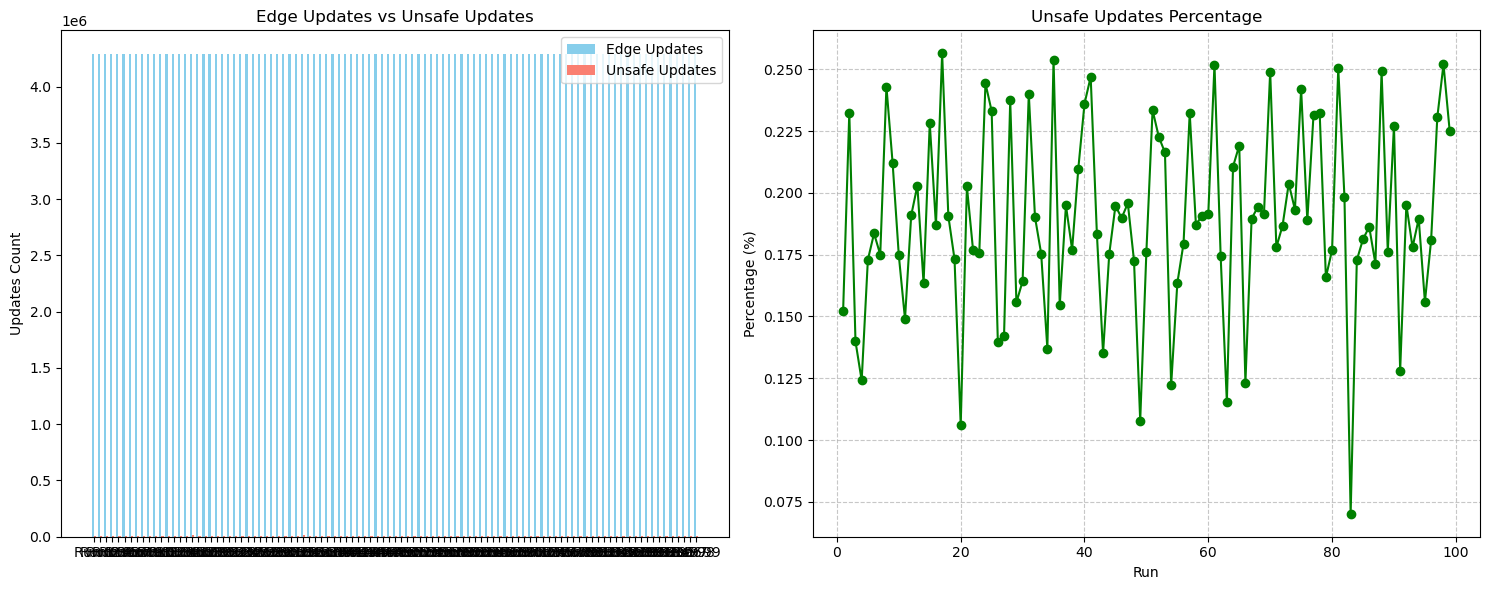


所有运行中，unsafe updates占edge updates的平均百分比为: 0.189425%


In [5]:
import re
import os

def analyze_log_file(file_path):
    # 检查文件是否存在
    if not os.path.exists(file_path):
        print(f"文件不存在: {file_path}")
        return []
    
    # 读取文件内容
    with open(file_path, 'r') as file:
        file_content = file.read()
    
    # 定义正则表达式模式来匹配相关数据
    edge_updates_pattern = re.compile(r'(\d+) edge updates\.')
    unsafe_updates_pattern = re.compile(r'(\d+) unsafe updates\.')
    
    # 存储提取的数据
    results = []
    
    # 分割日志为每一次运行
    runs = re.split(r'----------- Loading graphs ------------', file_content)
    
    # 遍历每一次运行的日志
    for i, run in enumerate(runs[1:], 1):  # 跳过第一个分割，它通常是空的或不完整的
        # 提取edge updates
        edge_updates_match = edge_updates_pattern.search(run)
        # 提取unsafe updates
        unsafe_updates_match = unsafe_updates_pattern.search(run)
        
        if edge_updates_match and unsafe_updates_match:
            edge_updates = int(edge_updates_match.group(1))
            unsafe_updates = int(unsafe_updates_match.group(1))
            
            # 计算百分比
            percentage = (unsafe_updates / edge_updates) * 100 if edge_updates > 0 else 0
            
            results.append({
                "run": i,
                "edge_updates": edge_updates,
                "unsafe_updates": unsafe_updates,
                "percentage": percentage
            })
    
    return results

def print_summary(results):
    if not results:
        print("没有找到有效的结果数据")
        return
        
    # 打印表头
    print(f"{'Run':<5} {'Edge Updates':<15} {'Unsafe Updates':<15} {'Percentage (%)':<15}")
    print("-" * 50)
    
    # 计算总计和平均值
    total_edge_updates = 0
    total_unsafe_updates = 0
    
    # 打印每条记录
    for result in results:
        print(f"{result['run']:<5} {result['edge_updates']:<15} {result['unsafe_updates']:<15} {result['percentage']:.6f}")
        total_edge_updates += result['edge_updates']
        total_unsafe_updates += result['unsafe_updates']
    
    # 计算总百分比
    total_percentage = (total_unsafe_updates / total_edge_updates) * 100 if total_edge_updates > 0 else 0
    
    # 打印总计
    print("-" * 50)
    print(f"{'总计':<5} {total_edge_updates:<15} {total_unsafe_updates:<15} {total_percentage:.6f}")
    print(f"{'平均':<5} {total_edge_updates/len(results):<15.2f} {total_unsafe_updates/len(results):<15.2f} {total_percentage:.6f}")

# 指定symbi.txt的路径
file_path = "/home/cc/haibin2/CSM-Benchmark/ContinuousSubgraphMatching/logs_txt/parallel_symbi_FM4_16.txt"

# 分析文件并打印结果
results = analyze_log_file(file_path)
print_summary(results)
print("livejournal with query graph on 6 vertex")

# 绘制图表以更好地可视化结果
import matplotlib.pyplot as plt
import numpy as np

if results:
    # 提取数据
    runs = [r['run'] for r in results]
    edge_updates = [r['edge_updates'] for r in results]
    unsafe_updates = [r['unsafe_updates'] for r in results]
    percentages = [r['percentage'] for r in results]
    
    # 创建两个子图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 第一个子图：显示unsafe updates与edge updates的对比
    width = 0.35
    x = np.arange(len(runs))
    ax1.bar(x, edge_updates, width, label='Edge Updates', color='skyblue')
    ax1.bar(x + width, unsafe_updates, width, label='Unsafe Updates', color='salmon')
    ax1.set_xticks(x + width/2)
    ax1.set_xticklabels([f'Run {r}' for r in runs])
    ax1.set_ylabel('Updates Count')
    ax1.set_title('Edge Updates vs Unsafe Updates')
    ax1.legend()
    
    # 第二个子图：显示unsafe updates占edge updates的百分比
    ax2.plot(runs, percentages, 'o-', color='green')
    ax2.set_xlabel('Run')
    ax2.set_ylabel('Percentage (%)')
    ax2.set_title('Unsafe Updates Percentage')
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # 显示平均百分比
    avg_percentage = sum(percentages) / len(percentages)
    print(f"\n所有运行中，unsafe updates占edge updates的平均百分比为: {avg_percentage:.6f}%")

Run   Edge Updates    Unsafe Updates  Percentage (%) 
--------------------------------------------------
1     244354          30185           12.352980
2     244341          7610            3.114500
3     244341          11725           4.798622
4     244341          15290           6.257648
5     244350          22097           9.043176
6     244356          8256            3.378677
7     244356          11037           4.516771
8     244355          10478           4.288024
9     244356          9676            3.959796
10    244354          21485           8.792571
11    244341          7127            2.916825
12    244355          6466            2.646150
13    244355          7683            3.144196
14    244355          28338           11.597062
15    244355          9534            3.901700
16    244356          24474           10.015715
17    244355          5020            2.054388
18    244355          24074           9.852060
19    244341          8574            3.509030

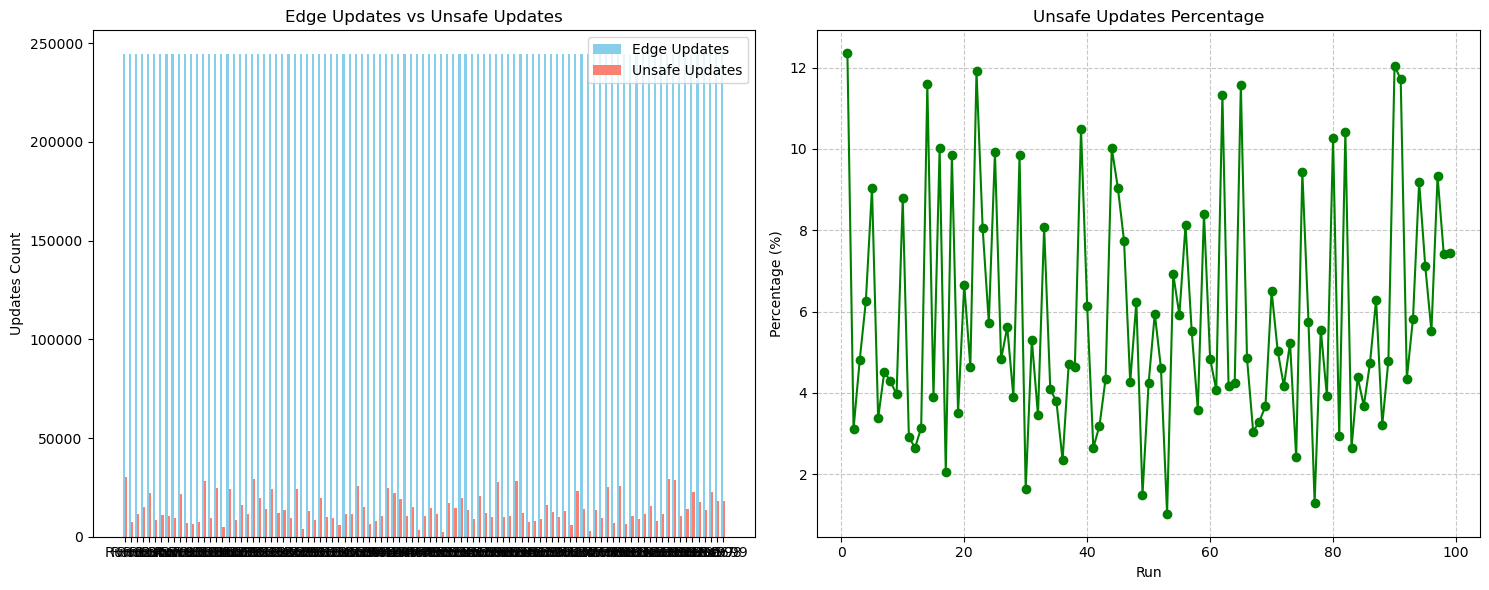


所有运行中，unsafe updates占edge updates的平均百分比为: 5.827640%


In [6]:
import re
import os

def analyze_log_file(file_path):
    # 检查文件是否存在
    if not os.path.exists(file_path):
        print(f"文件不存在: {file_path}")
        return []
    
    # 读取文件内容
    with open(file_path, 'r') as file:
        file_content = file.read()
    
    # 定义正则表达式模式来匹配相关数据
    edge_updates_pattern = re.compile(r'(\d+) edge updates\.')
    unsafe_updates_pattern = re.compile(r'(\d+) unsafe updates\.')
    
    # 存储提取的数据
    results = []
    
    # 分割日志为每一次运行
    runs = re.split(r'----------- Loading graphs ------------', file_content)
    
    # 遍历每一次运行的日志
    for i, run in enumerate(runs[1:], 1):  # 跳过第一个分割，它通常是空的或不完整的
        # 提取edge updates
        edge_updates_match = edge_updates_pattern.search(run)
        # 提取unsafe updates
        unsafe_updates_match = unsafe_updates_pattern.search(run)
        
        if edge_updates_match and unsafe_updates_match:
            edge_updates = int(edge_updates_match.group(1))
            unsafe_updates = int(unsafe_updates_match.group(1))
            
            # 计算百分比
            percentage = (unsafe_updates / edge_updates) * 100 if edge_updates > 0 else 0
            
            results.append({
                "run": i,
                "edge_updates": edge_updates,
                "unsafe_updates": unsafe_updates,
                "percentage": percentage
            })
    
    return results

def print_summary(results):
    if not results:
        print("没有找到有效的结果数据")
        return
        
    # 打印表头
    print(f"{'Run':<5} {'Edge Updates':<15} {'Unsafe Updates':<15} {'Percentage (%)':<15}")
    print("-" * 50)
    
    # 计算总计和平均值
    total_edge_updates = 0
    total_unsafe_updates = 0
    
    # 打印每条记录
    for result in results:
        print(f"{result['run']:<5} {result['edge_updates']:<15} {result['unsafe_updates']:<15} {result['percentage']:.6f}")
        total_edge_updates += result['edge_updates']
        total_unsafe_updates += result['unsafe_updates']
    
    # 计算总百分比
    total_percentage = (total_unsafe_updates / total_edge_updates) * 100 if total_edge_updates > 0 else 0
    
    # 打印总计
    print("-" * 50)
    print(f"{'总计':<5} {total_edge_updates:<15} {total_unsafe_updates:<15} {total_percentage:.6f}")
    print(f"{'平均':<5} {total_edge_updates/len(results):<15.2f} {total_unsafe_updates/len(results):<15.2f} {total_percentage:.6f}")

# 指定symbi.txt的路径
file_path = "/home/cc/haibin2/CSM-Benchmark/ContinuousSubgraphMatching/logs_txt/symbi_icpx_6t_amazon.txt"

# 分析文件并打印结果
results = analyze_log_file(file_path)
print_summary(results)
print("livejournal with query graph on 6 vertex")

# 绘制图表以更好地可视化结果
import matplotlib.pyplot as plt
import numpy as np

if results:
    # 提取数据
    runs = [r['run'] for r in results]
    edge_updates = [r['edge_updates'] for r in results]
    unsafe_updates = [r['unsafe_updates'] for r in results]
    percentages = [r['percentage'] for r in results]
    
    # 创建两个子图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 第一个子图：显示unsafe updates与edge updates的对比
    width = 0.35
    x = np.arange(len(runs))
    ax1.bar(x, edge_updates, width, label='Edge Updates', color='skyblue')
    ax1.bar(x + width, unsafe_updates, width, label='Unsafe Updates', color='salmon')
    ax1.set_xticks(x + width/2)
    ax1.set_xticklabels([f'Run {r}' for r in runs])
    ax1.set_ylabel('Updates Count')
    ax1.set_title('Edge Updates vs Unsafe Updates')
    ax1.legend()
    
    # 第二个子图：显示unsafe updates占edge updates的百分比
    ax2.plot(runs, percentages, 'o-', color='green')
    ax2.set_xlabel('Run')
    ax2.set_ylabel('Percentage (%)')
    ax2.set_title('Unsafe Updates Percentage')
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # 显示平均百分比
    avg_percentage = sum(percentages) / len(percentages)
    print(f"\n所有运行中，unsafe updates占edge updates的平均百分比为: {avg_percentage:.6f}%")

In [ ]:
/home/cc/haibin2/CSM-Benchmark/ContinuousSubgraphMatching/logs_txt/symbi_icpx_6t_amazon.txt